In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.api as sm
import statsmodels.formula.api  as smf
import scipy.stats
from scipy.stats import norm

In [2]:
data = pd.read_csv("data/data3a.csv")

In [5]:
results = smf.poisson('y ~ x', data=data).fit()
results.summary

Optimization terminated successfully.
         Current function value: 2.353863
         Iterations 12


<bound method DiscreteResults.summary of <statsmodels.discrete.discrete_model.PoissonResults object at 0x1160272b0>>

In [9]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                       Results: Poisson
===============================================================
Model:              Poisson          No. Iterations:   12.0000 
Dependent Variable: y                Pseudo R-squared: 0.009   
Date:               2018-12-07 12:53 AIC:              474.7725
No. Observations:   100              BIC:              479.9828
Df Model:           1                Log-Likelihood:   -235.39 
Df Residuals:       98               LL-Null:          -237.64 
Converged:          1.0000           Scale:            1.0000  
-----------------------------------------------------------------
            Coef.    Std.Err.     z      P>|z|    [0.025   0.975]
-----------------------------------------------------------------
Intercept   1.2917     0.3637   3.5517   0.0004   0.5789   2.0045
x           0.0757     0.0356   2.1251   0.0336   0.0059   0.1454
===============================================================

"""

### 9.2 GLMのベイズ化

In [14]:
import pymc3

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (3 chains in 3 jobs)
NUTS: [beta2, beta1]
Sampling 3 chains:  80%|████████  | 5065/6300 [00:09<00:02, 616.95draws/s]/Users/takizawatakafumi/anaconda/lib/python3.5/site-packages/tqdm/_monitor.py:89: TqdmSynchronisationWarning: Set changed size during iteration (see https://github.com/tqdm/tqdm/issues/481)
  TqdmSynchronisationWarning)
Sampling 3 chains: 100%|██████████| 6300/6300 [00:12<00:00, 514.69draws/s]
The acceptance probability does not match the target. It is 0.9119375981415659, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 25% for some parameters.


,mean,sd,mc_error,hpd_2.5,hpd_97.5,n_eff,Rhat
beta1,1.296783,0.354350,0.011862,0.522240,1.941519,852.615876,1.006976
beta2,0.075062,0.034743,0.001161,0.003468,0.142280,853.534006,1.006991


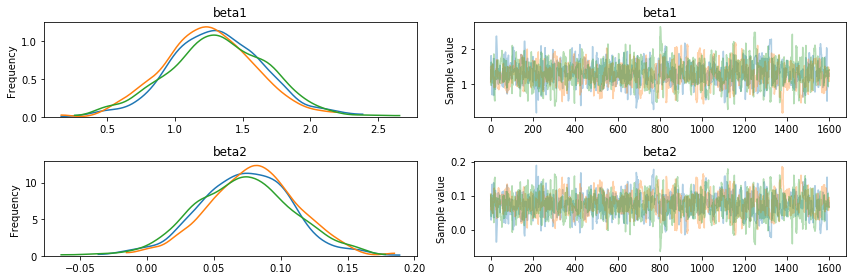

In [16]:
# モデルを定義する。
with pymc3.Model() as model:
    # 事前分布をN(0, 100)の正規分布で設定
    beta1 = pymc3.Normal('beta1', mu=0, sd=100)
    beta2 = pymc3.Normal('beta2', mu=0, sd=100)
    
    # 線形予測子をβ1+β2xで設定
    theta = beta1 + beta2 * data['x'].values
    
    # ログリンク関数（log(μ)＝θ⇔μ＝exp(θ)）を設定し、ポアソン分布で推定する。
    y = pymc3.Poisson('y', mu=np.exp(theta), observed=data['y'].values)
    
    # サンプリングして推定する
with model:
    trace = pymc3.sample(1600, burn=100, thin=100, njobs=3, random_seed=0)
        
pymc3.traceplot(trace)
pymc3.summary(trace)